In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causalimpact import CausalImpact

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('part4_model.csv',
                index_col='Date', parse_dates=['Date'])
df.head()

,y,X1,X2
Date,,,
2020-01-01,9.879738,4.713213,1.000000
2020-01-02,14.148685,6.184635,1.070755
2020-01-03,12.234454,4.245442,1.141509
2020-01-04,14.381533,5.485862,1.212264
2020-01-05,11.311636,4.563055,1.283019


In [3]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='Date', length=213, freq=None)

In [4]:
df.index.freq = df.index.inferred_freq

In [5]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31'],
              dtype='datetime64[ns]', name='Date', length=213, freq='D')

In [6]:
pre_period = ['2020-01-01', '2020-04-30']
post_period = ['2020-07-01', '2020-07-31']

In [7]:
ciModel = CausalImpact(df, pre_period, post_period)

/home/ronggolawe/anaconda3/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(


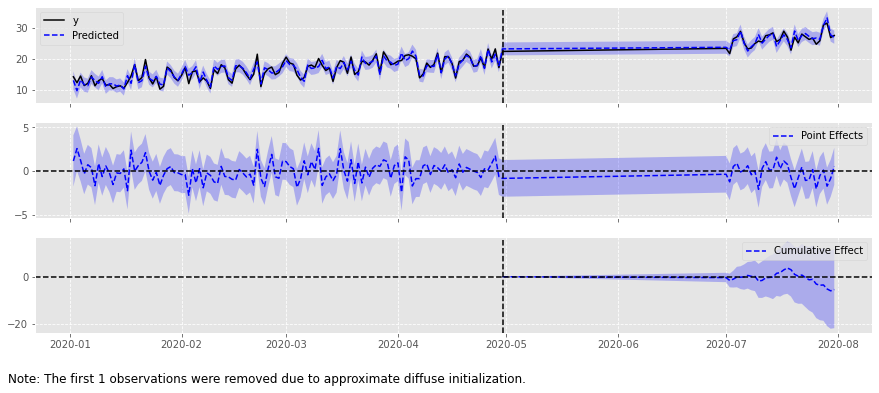

In [8]:
ciModel.plot(figsize=(15, 6));

In [9]:
print(ciModel.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    26.32              815.86
Prediction (s.d.)         26.49 (0.28)       821.29 (8.59)
95% CI                    [25.94, 27.02]     [804.06, 837.73]

Absolute effect (s.d.)    -0.18 (0.28)       -5.43 (8.59)
95% CI                    [-0.71, 0.38]      [-21.87, 11.8]

Relative effect (s.d.)    -0.66% (1.05%)     -0.66% (1.05%)
95% CI                    [-2.66%, 1.44%]    [-2.66%, 1.44%]

Posterior tail-area probability p: 0.26
Posterior prob. of a causal effect: 74.03%

For more details run the command: print(impact.summary('report'))


In [10]:
print(ciModel.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 26.32. In the absence of an
intervention, we would have expected an average response of 26.49.
The 95% interval of this counterfactual prediction is [25.94, 27.02].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.18 with a 95% interval of
[-0.71, 0.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 815.86.
Had the intervention not taken place, we would have expected
a sum of 821.29. The 95% interval of this prediction is [804.06, 837.73].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showed a decrease of -0.

In [11]:
df['y'].loc['2020-07-01':] = df['y'].loc['2020-07-01':] + 5

In [12]:
ciModel = CausalImpact(df, pre_period, post_period)

/home/ronggolawe/anaconda3/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: nseasons, standardize. After release 0.14, this will raise.
  warnings.warn(


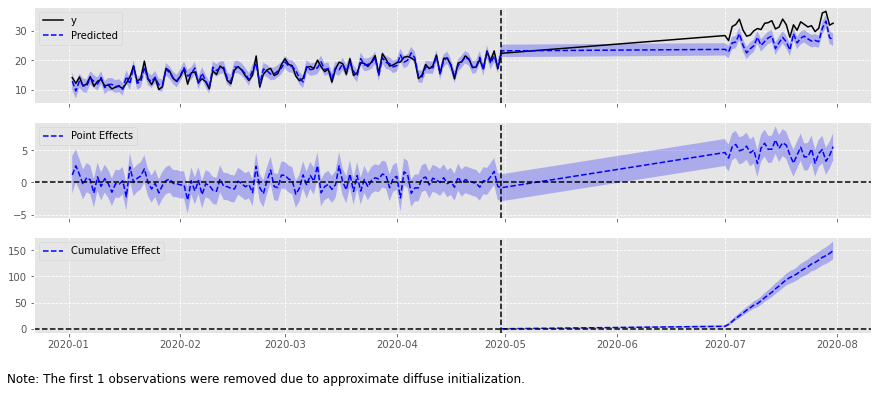

In [13]:
ciModel.plot(figsize=(15, 6));

In [14]:
print(ciModel.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    31.32              970.86
Prediction (s.d.)         26.49 (0.28)       821.29 (8.64)
95% CI                    [25.94, 27.03]     [804.05, 837.94]

Absolute effect (s.d.)    4.82 (0.28)        149.57 (8.64)
95% CI                    [4.29, 5.38]       [132.93, 166.81]

Relative effect (s.d.)    18.21% (1.05%)     18.21% (1.05%)
95% CI                    [16.19%, 20.31%]   [16.19%, 20.31%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [15]:
print(ciModel.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 31.32. By contrast, in the absence of an
intervention, we would have expected an average response of 26.49.
The 95% interval of this counterfactual prediction is [25.94, 27.03].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.82 with a 95% interval of
[4.29, 5.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 970.86.
By contrast, had the intervention not taken place, we would have expected
a sum of 821.29. The 95% interval of this prediction is [804.05, 837.94].


The above results are given in terms of absolute numbers. In relative
terms, the response variable 

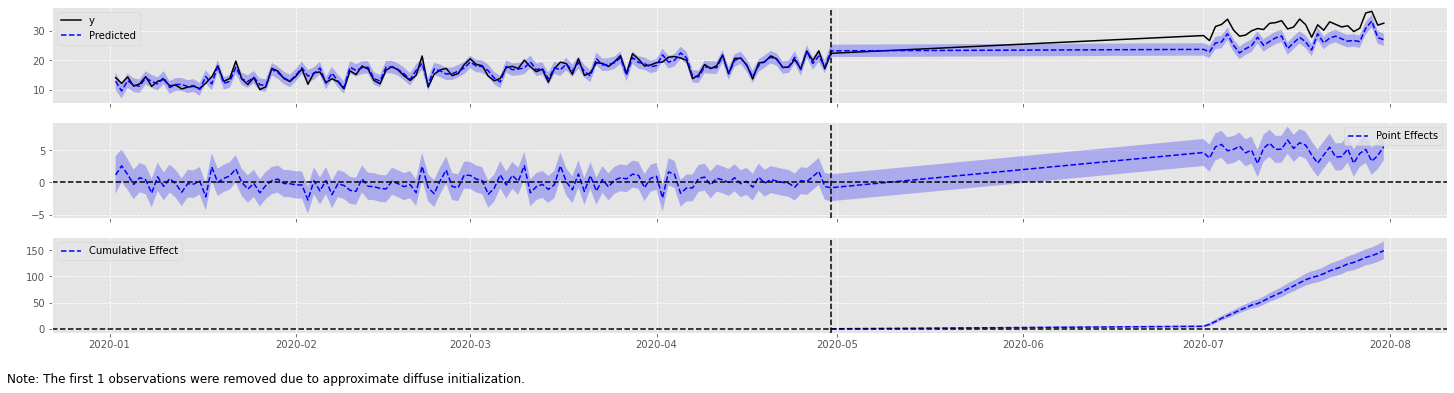

In [16]:
ciModel.plot(figsize=(25, 6));

In [17]:
print(ciModel.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    31.32              970.86
Prediction (s.d.)         26.49 (0.28)       821.29 (8.64)
95% CI                    [25.94, 27.03]     [804.05, 837.94]

Absolute effect (s.d.)    4.82 (0.28)        149.57 (8.64)
95% CI                    [4.29, 5.38]       [132.93, 166.81]

Relative effect (s.d.)    18.21% (1.05%)     18.21% (1.05%)
95% CI                    [16.19%, 20.31%]   [16.19%, 20.31%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [18]:
print(ciModel.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 31.32. By contrast, in the absence of an
intervention, we would have expected an average response of 26.49.
The 95% interval of this counterfactual prediction is [25.94, 27.03].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.82 with a 95% interval of
[4.29, 5.38]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 970.86.
By contrast, had the intervention not taken place, we would have expected
a sum of 821.29. The 95% interval of this prediction is [804.05, 837.94].


The above results are given in terms of absolute numbers. In relative
terms, the response variable 

In [19]:
ciModel.p_value

0.0

In [20]:
ciModel.alpha

0.05

In [21]:
ciModel.n_sims

1000

In [22]:
ciModel.model_args

{'standardize': True, 'nseasons': []}

In [23]:
ciModel.lower_upper_percentile

[2.5, 97.5]

In [24]:
ciModel.data # original data

,y,X1,X2
Date,,,
2020-01-01,9.879738,4.713213,1.000000
2020-01-02,14.148685,6.184635,1.070755
2020-01-03,12.234454,4.245442,1.141509
2020-01-04,14.381533,5.485862,1.212264
2020-01-05,11.311636,4.563055,1.283019
...,...,...,...
2020-07-27,30.781768,4.604043,15.716981
2020-07-28,35.928153,6.772355,15.787736
2020-07-29,36.485550,7.900010,15.858491


In [25]:
ciModel.inferences

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
Date,,,,,,,,,,,,,,,,
2020-01-01,NaN,11.280000,NaN,NaN,NaN,-6541.630505,6564.190505,NaN,NaN,NaN,-1.400262,-6554.310767,6551.510243,NaN,NaN,NaN
2020-01-02,NaN,12.975842,NaN,NaN,NaN,10.053408,15.898275,NaN,NaN,NaN,1.172843,-1.749590,4.095277,NaN,NaN,NaN
2020-01-03,NaN,9.651100,NaN,NaN,NaN,7.119904,12.182297,NaN,NaN,NaN,2.583354,0.052157,5.114550,NaN,NaN,NaN
2020-01-04,NaN,13.134705,NaN,NaN,NaN,10.747993,15.521417,NaN,NaN,NaN,1.246829,-1.139884,3.633541,NaN,NaN,NaN
2020-01-05,NaN,11.624080,NaN,NaN,NaN,9.312887,13.935272,NaN,NaN,NaN,-0.312444,-2.623636,1.998749,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,834.130679,26.271801,26.271801,24.159681,28.383922,24.159681,28.383922,702.733293,687.355530,717.971799,4.509966,2.397846,6.622087,131.397386,116.158880,146.775148
2020-07-28,870.058831,30.799739,30.799739,28.686913,32.912565,28.686913,32.912565,733.533032,718.114782,748.835368,5.128414,3.015587,7.241240,136.525799,121.223463,151.944049
2020-07-29,906.544381,33.189537,33.189537,31.076005,35.303069,31.076005,35.303069,766.722569,750.934794,782.879776,3.296013,1.182481,5.409544,139.821812,123.664604,155.609587


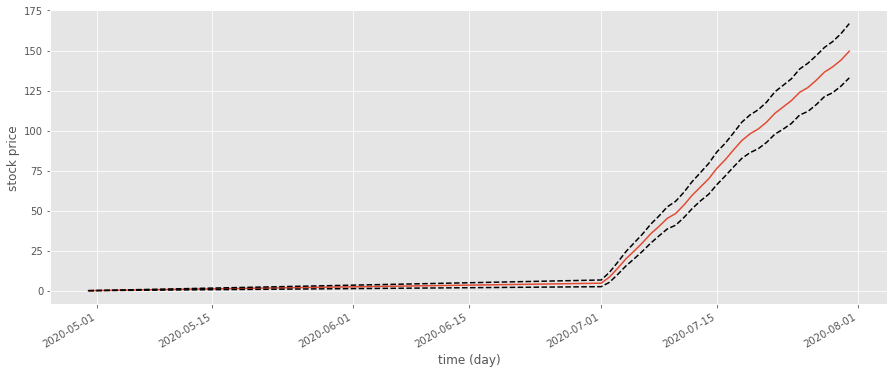

In [34]:
ax = ciModel.inferences['post_cum_effects'].plot(figsize=(15,6))
ciModel.inferences.post_cum_effects_upper.plot(ax=ax, style='k--');
ciModel.inferences.post_cum_effects_lower.plot(ax=ax, style='k--');
plt.ylabel('stock price');
plt.xlabel('time (day)');

In [35]:
ciModel.normed_post_data

,y,X1,X2
Date,,,
2020-07-01,3.604184,-0.747975,3.492850
2020-07-02,3.095794,-1.186115,3.521480
2020-07-03,4.516827,0.226745,3.550110
2020-07-04,4.719603,0.340931,3.578740
2020-07-05,5.250372,1.638484,3.607370
2020-07-06,4.151412,-0.268826,3.635999
2020-07-07,3.539900,-1.535258,3.664629
2020-07-08,3.649057,-0.894482,3.693259
2020-07-09,4.077044,-0.445990,3.721889


In [36]:
ciModel.normed_pre_data

,y,X1,X2
Date,,,
2020-01-01,-1.913516,-0.300308,-1.717795
2020-01-02,-0.636682,1.157621,-1.689165
2020-01-03,-1.209225,-0.763790,-1.660535
2020-01-04,-0.567037,0.465256,-1.631905
2020-01-05,-1.485238,-0.449089,-1.603275
...,...,...,...
2020-04-26,2.046257,1.248929,1.603275
2020-04-27,1.067407,-0.727601,1.631905
2020-04-28,2.057988,0.427545,1.660535


In [37]:
ciModel.simulated_y

array([[24.00349119, 24.34934609, 25.58566703, ..., 33.10481581,
        25.37428656, 25.13613904],
       [22.66985697, 21.84676649, 26.12687443, ..., 33.10969538,
        27.1325884 , 26.28377627],
       [23.12301102, 21.20083621, 27.83496115, ..., 33.10035016,
        26.08831725, 28.37801137],
       ...,
       [25.60115321, 20.00532271, 25.33166344, ..., 32.84153387,
        25.08927721, 26.38578421],
       [24.21190838, 23.7804949 , 24.89100673, ..., 33.85271287,
        26.60435876, 26.31056159],
       [21.72262492, 25.00284487, 25.47275988, ..., 33.4720968 ,
        27.48593017, 27.22359834]])

In [40]:
ciModel.summary_data

,average,cumulative
actual,31.318138,970.862268
predicted,26.493244,821.290555
predicted_lower,25.937136,804.051218
predicted_upper,27.030178,837.935531
abs_effect,4.824894,149.571713
abs_effect_lower,4.287959,132.926737
abs_effect_upper,5.381002,166.811050
rel_effect,0.182118,0.182118
rel_effect_lower,0.161851,0.161851
rel_effect_upper,0.203108,0.203108
